# Customizing Gates

Pulse parameters for Hadamard gate

In [44]:
from qiskit import QuantumCircuit, IBMQ, transpile, schedule, pulse, assemble
from qiskit.circuit import Parameter
from qiskit.tools.monitor import job_monitor
from qiskit.pulse.library import Gaussian
from qiskit.visualization import plot_histogram
from qiskit.test.mock import FakeArmonk

In [45]:
IBMQ.save_account('84e47768480771b0f65f16b3f25447e5ab6b88d174cccb8271d1d0a3e4fdf3ce875e7f9f2612ad64f6f107644f49d8c6d9cd2619469de103753b4ae7556e703a')
IBMQ.load_account()

backend = FakeArmonk()

configrc.store_credentials:WARNING:2022-07-16 23:50:18,050: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-07-16 23:50:19,205: Credentials are already in use. The existing account in the session will be replaced.


In [46]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [47]:
qc_t = transpile(qc,backend)
qc_sched = schedule(qc_t,backend)
print(qc_sched.instructions)

((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, Play(Drag(duration=320, amp=(0.37526098415448106-0.08060535276562332j), sigma=80, beta=-0.9829945644928844, name='drag_412b'), DriveChannel(0), name='drag_412b')), (320, ShiftPhase(-1.5707963268, DriveChannel(0))), (320, Acquire(22400, AcquireChannel(0), MemorySlot(0))), (320, Play(GaussianSquare(duration=22400, amp=(-0.3584733362723958+0.05040701520361846j), sigma=64, width=22144, name='gaussian_square_b937'), MeasureChannel(0), name='gaussian_square_b937')))


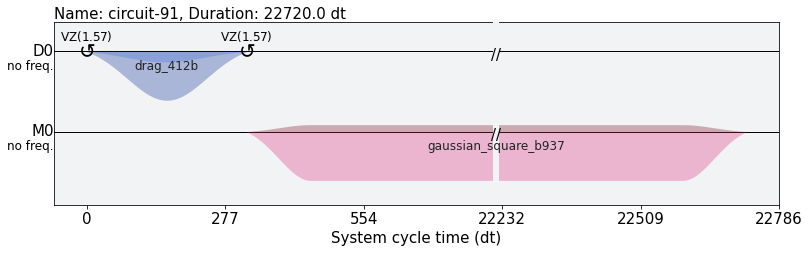

In [48]:
qc_sched.draw()

In [ ]:
with pulse.build(backend) as pulse sched:
    pulse.play()

Parameters for X gate

In [ ]:
qc1 = QuantumCircuit(1,1)
qc1.x(0)
qc1.measure(0,0)
qc1.draw()

In [ ]:
qc1_t = transpile(qc1,backend)
qc1_sched = schedule(qc1_t,backend)
print(qc1_sched.instructions)

In [ ]:
qc1_sched.draw()

In [ ]:
qc.save_statevector()

In [ ]:
qobj1 = assemble(qc1_sched,backend)
job = backend.run(qobj1)

In [ ]:
plot_histogram(job.result().get_counts())

Paramters for Z gate

In [ ]:
qc2 = QuantumCircuit(1,1)
qc2.s(0)
qc2.measure(0,0)
qc2.draw()

In [ ]:
qc2_t = transpile(qc2,backend)
qc2_sched = schedule(qc2_t,backend)
print(qc2_sched.instructions)

In [ ]:
qc2_sched.draw()

In [ ]:
qobj2 = assemble(qc2_sched,backend)
job2 = backend.run(qobj2)

In [ ]:
plot_histogram(job2.result().get_counts())

Parameters of X and Z gate on same qubit

In [ ]:


qc3 = QuantumCircuit(1,1)
qc3.x(0)
qc3.z(0)
qc3.measure(0,0)
qc3.draw('mpl')

In [ ]:
qc3_t = transpile(qc3, backend)
qc3_sched = schedule(qc3_t,backend)
print(qc3_sched.instructions)

In [ ]:
qc3_sched.draw()

# Custom Gate

In [30]:
import numpy as np
from qiskit.circuit import Gate
from qiskit import pulse
from qiskit.pulse.library import Gaussian

In [31]:
c_gate = Gate(name='custom', label='C', num_qubits=1, params=[])

In [32]:
qubit = 0
GHz = 1.0e9

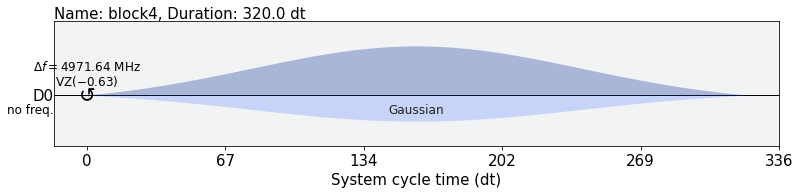

In [33]:
with pulse.build(backend) as gate_pulse:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(4.97164*GHz,drive_chan)
    pulse.shift_phase(np.pi/5,drive_chan)
    pulse.play(pulse.Gaussian(duration=320, amp=0.112233 + 0.778899j, sigma=80,
                              ),drive_chan)S
gate_pulse.draw()

In [34]:
#Circuit
cc = QuantumCircuit(1,1)
cc.append(c_gate,[0])
cc.measure(0,0)
cc.draw()

┌───┐┌─┐
  q: ┤ C ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [35]:
cc.add_calibration('custom',[0],gate_pulse)
cc.draw()

┌───┐┌─┐
  q: ┤ C ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

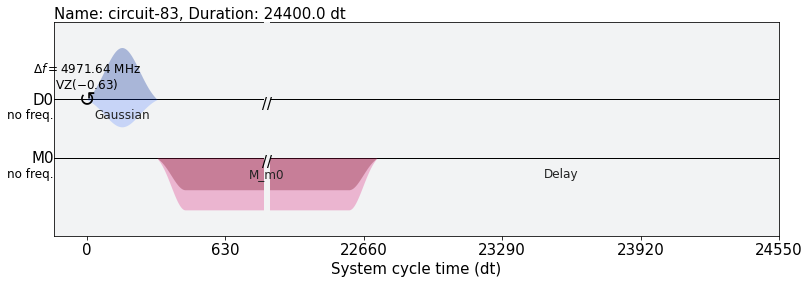

In [36]:
cc_pulse = schedule(cc, backend)
cc_pulse.draw()

In [37]:
pulse_sched = assemble(cc_pulse, backend=backend, meas_level=2, meas_return='single',
                      shots = 3200)
job_custom = backend.run(pulse_sched)

/home/akash/.local/lib/python3.10/site-packages/qiskit/compiler/assembler.py:460: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn(


QiskitError: "Invalid input object Pulse Qobj: 8427701d-2079-4567-b2df-8ab7915f84d4:\nConfig: {'init_qubits': True,\n 'meas_level': 2,\n 'meas_lo_freq': [7.163214088,\n                  7.283322155,\n                  7.218928102,\n                  7.110142342000001,\n                  7.346997692],\n 'meas_return': 'single',\n 'memory': False,\n 'memory_slot_size': 100,\n 'memory_slots': 1,\n 'n_qubits': 5,\n 'parametric_pulses': ['gaussian', 'gaussian_square', 'drag', 'constant'],\n 'pulse_library': [],\n 'qubit_lo_freq': [4.962770879920025,\n                   4.838412258764764,\n                   5.036989248286842,\n                   4.951300212210368,\n                   5.066350584469812],\n 'rep_delay': 250.0,\n 'rep_time': 1000,\n 'shots': 3200}\nHeader: {'backend_name': 'fake_manila', 'backend_version': '1.0.4'}\nExperiments:\n\nPulse Experiment:\nHeader:\n{'memory_slots': 1, 'metadata': {}, 'name': 'circuit-83'}\nConfig:\n{}\n\n\tInstruction: setf\n\t\tt0: 0\n\t\tch: d0\n\t\tfrequency: 4.97164\n\n\tInstruction: fc\n\t\tt0: 0\n\t\tch: d0\n\t\tphase: 0.6283185307179586\n\n\tInstruction: parametric_pulse\n\t\tt0: 0\n\t\tch: d0\n\t\tpulse_shape: gaussian\n\t\tparameters: {'duration': 320, 'amp': (0.112233+0.778899j), 'sigma': 80}\n\n\tInstruction: parametric_pulse\n\t\tt0: 320\n\t\tch: m0\n\t\tpulse_shape: gaussian_square\n\t\tparameters: {'duration': 22400, 'amp': (-0.23877102316798726-0.14624772988088564j), 'sigma': 64, 'width': 22144}\n\n\tInstruction: delay\n\t\tt0: 22720\n\t\tch: m0\n\t\tduration: 1680\n\n\tInstruction: acquire\n\t\tt0: 320\n\t\tduration: 22400\n\t\tqubits: [0]\n\t\tmemory_slot: [0]\n\n, must be either a QuantumCircuit, Schedule, or a list of either"

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_custom)

In [ ]:
job_result = job_custom.result()

In [ ]:
print(job_result.get_counts())

In [ ]:
plot_histogram(job_result.get_counts())

# Custom gate in Simulator

In [1]:
from qiskit.test import mock
from qiskit.test.mock import FakeArmonk

In [2]:
backend = mock.FakeArmonk()

In [6]:
C = Gate('Custom Gate',label='C',num_qubits=1,params=[])

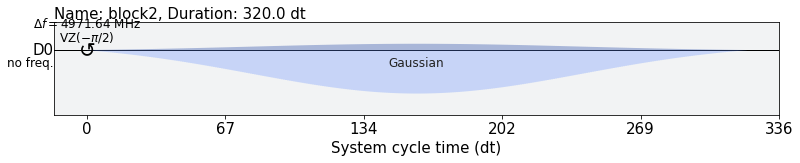

In [10]:
with pulse.build(backend) as gate_pulse1:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(4.97164*GHz,drive_chan)
    pulse.shift_phase(np.pi/2,drive_chan)
    pulse.play(pulse.Gaussian(duration=320, amp=.112233 + 0.778899j , sigma=80,
                              ),drive_chan)
gate_pulse1.draw()

In [13]:
cc = QuantumCircuit(1,1)
cc.append(C,[0])
cc.measure(0,0)
cc.add_calibration('Custom Gate', [0], gate_pulse1)


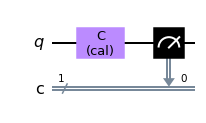

In [14]:
cc.draw('mpl')

In [15]:
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel

backend_sim = PulseSimulator.from_backend(backend)
backend_model=PulseSystemModel.from_backend(backend)

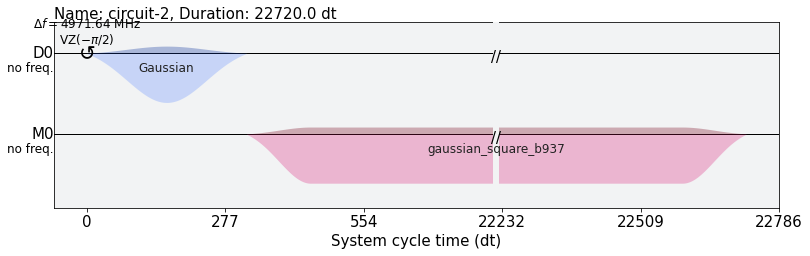

In [16]:
cc_t = transpile(cc, backend)
cc_pulse = schedule(cc_t, backend)
cc_pulse.draw()

In [18]:

pulse_sched_c = assemble(cc_pulse,backend=backend_sim,meas_level=2,meas_return='single',shots=3200)

In [19]:
job1_c = backend_sim.run(pulse_sched_c,backend_model)

In [20]:
plot_histogram(job1_c.result().get_counts())

AerError: 'Schedules contain shift frequency and/or set frequency instructions, are not supported by PulseSimulator.'

In [ ]:
from qiskit import assemble, pulse, QuantumCircuit,\
                   schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit import IBMQ
from qiskit.visualization.pulse_v2 import draw
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram,plot_state_city, plot_bloch_vector,plot_state_qsphere
# fake quantum computer we're using
backend = mock.FakeArmonk()

'''IBMQ.save_account('5aa05e965118a4d4c39c15a864c922b90f9beacaa68818452d6d5bdc0a9642e3ebcec552361e81811e90133399c375cdceb726c0eebd8b318a5158259740b2f7')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend=provider.get_backend('ibmq_belem')'''

#m=pulse.library.GaussianSquare(22400, 0.3051214347689275+0.1714669357180885j, 64, 22144)

#    pulse.acquire(m, pulse.acquire_channel(0), MemorySlot(0))

#print(h_q0.instructions)


#job=execute(qc, backend=backend, shots=2000, optimization_level=0)
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)
#result=job.result()




# prepare the pulse job
pulse_qobj = assemble(qc_pulse, backend=backend_sim)

# run the job on the backend
result = backend_sim.run(qc_pulse, SystemModel=backend_model).result()

counts = result.get_counts(qc)
print(counts)


plot_histogram(result.get_counts(qc))
psi  = result.get_statevector(qc)
'''print(psi)
plot_state_qsphere(psi)
plot_state_city(psi)
#plot_bloch_multivector(psi)'''

In [ ]:
from qiskit.pulse import DriveChannel
channel = DriveChannel(0)

amp = 0.35073525422528864*2
sigma = 80
num_samples = 320

h = pulse.library.Drag(num_samples, amp, sigma, -1.4459614505662715,name="H")

In [ ]:
with pulse.build(backend,name='Custom') as h_q0:
    pulse.shift_phase(-1.5707963268, channel)
    pulse.play(h, channel)

In [ ]:
from qiskit import QuantumCircuit
qc9 = QuantumCircuit(1,1)
qc9.h(0)
qc9.measure(0, 0)
    
qc9.add_calibration('H', [0], h_q0)
qc9.draw(output='mpl')

In [ ]:
backend_sim = PulseSimulator.from_backend(backend)
backend_model = PulseSystemModel.from_backend(backend)

In [ ]:
qc9t = transpile(qc9, backend)
qc9_pulse = schedule(qc9t, backend)

In [ ]:
result = backend_sim.run(qc9_pulse, SystemModel=backend_model).result()

counts = result.get_counts(qc9)



plot_histogram(result.get_counts(qc9))

In [ ]:
from qiskit import assemble, pulse, QuantumCircuit,\
                   schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit import IBMQ
from qiskit.visualization.pulse_v2 import draw
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram,plot_state_city, plot_bloch_vector,plot_state_qsphere
# fake quantum computer we're using
backend = mock.FakeArmonk()

'''IBMQ.save_account('5aa05e965118a4d4c39c15a864c922b90f9beacaa68818452d6d5bdc0a9642e3ebcec552361e81811e90133399c375cdceb726c0eebd8b318a5158259740b2f7')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend=provider.get_backend('ibmq_belem')'''

from qiskit.pulse import DriveChannel
channel = DriveChannel(0)

amp = 0.5555
sigma = 80
num_samples = 320

h = pulse.library.Drag(num_samples, amp, sigma, -1.4459614505662715,name="H")
#m=pulse.library.GaussianSquare(22400, 0.3051214347689275+0.1714669357180885j, 64, 22144)

with pulse.build(backend,name='Hadamard') as h_q0:
    pulse.shift_phase(-1.5707963268, channel)
    pulse.play(h, channel)
    pulse.shift_phase(-1.5707963268, channel)
#    pulse.acquire(m, pulse.acquire_channel(0), MemorySlot(0))

#print(h_q0.instructions)

from qiskit import QuantumCircuit
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0, 0)
    
qc.add_calibration('h', [0], h_q0)
qc.draw(output='mpl')
#job=execute(qc, backend=backend, shots=2000, optimization_level=0)
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)
#result=job.result()
backend_sim = PulseSimulator.from_backend(backend)
backend_model = PulseSystemModel.from_backend(backend)

qct = transpile(qc, backend)
qc_pulse = schedule(qct, backend)

# prepare the pulse job
pulse_qobj = assemble(qc_pulse, backend=backend_sim)

# run the job on the backend
result = backend_sim.run(qc_pulse, SystemModel=backend_model).result()

counts = result.get_counts(qc)
#print(counts)


plot_histogram(result.get_counts(qc))
#psi  = result.get_statevector(qc)
#'''print(psi)
#plot_state_qsphere(psi)
#plot_state_city(psi)
#plot_bloch_multivector(psi)'''